Этот набор данных содержит подробную информацию о 167 чемпионах из игры League of Legends. Датасет содержит строковые и числовые значения, отображающие все присущие чемпионам параметры.

В датасете представлены следующие атрибуты:
- Name — имя чемпиона League of Legends (строковый тип)
- Tags — классы чемпиона. (строковый тип)
- Role — основная роль или позиция, на которой играет чемпион. (строковый тип)
- Range type — является ли чемпион ближним или дальним боем. (строковый тип)
- Resource type — Ресурс, который чемпион может генерировать и потреблять при использовании способностей или базовой атаки. (строковый тип)
- Base HP — базовые очки здоровья чемпиона (HP) на уровне 1. (числовой тип)
- HP per lvl — количество HP, которое чемпион получает за уровень. (числовой тип)
- Base mana — базовые очки маны (MP) чемпиона на уровне 1. (числовой тип)
- Mana per lvl — количество очков маны (MP), которое чемпион получает за уровень. (числовой тип)
- Movement speed — базовая скорость передвижения чемпиона. (числовой тип)
- Base armor — базовая броня чемпиона на уровне 1. (числовой тип)
- Armor per lvl — количество брони, которую чемпион получает за уровень. (числовой тип)
- Base magic resistance — базовое сопротивление магии чемпиона на уровне 1. (числовой тип)
- Magic resistance per lvl — количество сопротивления магии, которое чемпион получает за уровень. (числовой тип)
- Attack range — максимальный радиус, с которого чемпион может атаковать. (числовой тип)
- HP regeneration — определяет количество восстановлиаемого здоровья чемпиона за 5 секунд. (числовой тип)
- HP regeneration per lvl — количество восстановливаемого здоровья за 5 секунд, которое чемпион получает за уровень. (числовой тип)
- Mana regeneration — определяет количество восстановливаемой маны чемпиона за 5 секунд. (числовой тип)
- Mana regeneration per lvl — количество восстановливаемой маны за 5 секунд, которое чемпион получает за уровень. (числовой тип)
- Attack damage — базовый урон от атаки чемпиона на уровне 1. (числовой тип)
- Attack damage per lvl — количество урона от атаки, которое чемпион получает за уровень. (числовой тип)
- Attack speed per lvl — количество скорости атаки, которое чемпион получает за уровень, (%). (числовой тип)
- Attack speed — базовая скорость атаки чемпиона (AS). (числовой тип)
- AS ratio — регулирует эффективность мультипликаторов скорости атаки из всех источников. (числовой тип)

In [54]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('LoL_champions.csv')
df.head()

,Name,Tags,Role,Range type,Resourse type,Base HP,HP per lvl,Base mana,Mana per lvl,Movement speed,...,Attack range,HP regeneration,HP regeneration per lvl,Mana regeneration,Mana regeneration per lvl,Attack damage,Attack damage per lvl,Attack speed per lvl,Attack speed,AS ratio
0,Aatrox,Fighter,Top,Melee,Blood Well,650,114,0,0.0,345,...,175,3.00,0.50,0.0,0.0,60,5.00,2.500,0.651,0.651
1,Ahri,"Mage,Assassin",Middle,Ranged,Mana,590,104,418,25.0,330,...,550,2.50,0.60,8.0,0.8,53,3.00,2.200,0.668,0.625
2,Akali,Assassin,"Top,Middle",Melee,Energy,600,119,200,0.0,345,...,125,9.00,0.90,50.0,0.0,62,3.30,3.200,0.625,0.625
3,Akshan,"Marksman,Assassin",Middle,Ranged,Mana,630,107,350,40.0,330,...,500,3.75,0.65,8.2,0.7,52,3.00,4.000,0.638,0.400
4,Alistar,"Tank,Support",Support,Melee,Mana,685,120,350,40.0,330,...,125,8.50,0.85,8.5,0.8,62,3.75,2.125,0.625,0.625


Ищем пропущенные значения:

In [55]:
df.isnull().sum()

Name                         0
Tags                         0
Role                         0
Range type                   0
Resourse type                7
Base HP                      0
HP per lvl                   0
Base mana                    0
Mana per lvl                 0
Movement speed               0
Base armor                   0
Armor per lvl                0
Base magic resistance        0
Magic resistance per lvl     0
Attack range                 0
HP regeneration              0
HP regeneration per lvl      0
Mana regeneration            0
Mana regeneration per lvl    0
Attack damage                0
Attack damage per lvl        0
Attack speed per lvl         0
Attack speed                 0
AS ratio                     0
dtype: int64

Пропущенные значения появляются только в строковом типе Resource type
По факту, значения не являются пропущенными, а лишь значат, что чемпион не обладает шкалой ресурса, поэтому на место пропущенных значений можно поставить None

In [56]:
df.fillna({'Resourse type':'None'}, inplace=True)

In [57]:
#Функция поиска выбросов
def Outliers(df):
    Q1=df.quantile(.25)
    Q3=df.quantile(.75)
    InterQ=Q3-Q1
    Q1-=InterQ*1.5
    Q3+=InterQ*1.5
    arr=np.array(df)
    QOut=[]
    for j in range(df.size):
        if (df.iat[j]<Q1) | (df.iat[j]>Q3):
            QOut.append(df.iat[j])
    return QOut

In [58]:
numdf = df.select_dtypes(include=[np.number])

Base HP
Среднее значение:  617.8562874251497
СКО:  39.46804036470702
Число пропущенных значений:  0
Всего выбросов:  2   [410, 500]
HP per lvl
Среднее значение:  104.05988023952096
СКО:  8.68713256919265
Число пропущенных значений:  0
Всего выбросов:  4   [126, 79, 129, 69]
Base mana
Среднее значение:  313.58682634730536
СКО:  122.07129289190388
Число пропущенных значений:  0
Всего выбросов:  20   [0, 60, 0, 0, 0, 100, 0, 100, 100, 100, 100, 4, 0, 0, 100, 100, 0, 2, 100, 0]
Mana per lvl
Среднее значение:  36.712574850299404
СКО:  19.780375998840572
Число пропущенных значений:  0
Всего выбросов:  1   [87.0]
Movement speed
Среднее значение:  336.1556886227545
СКО:  7.060816745057142
Число пропущенных значений:  0
Всего выбросов:  0   []
Base armor
Среднее значение:  29.88622754491018
СКО:  6.40069570924671
Число пропущенных значений:  0
Всего выбросов:  0   []
Armor per lvl
Среднее значение:  4.645209580838324
СКО:  0.5139099334189704
Число пропущенных значений:  0
Всего выбросов:  1   [

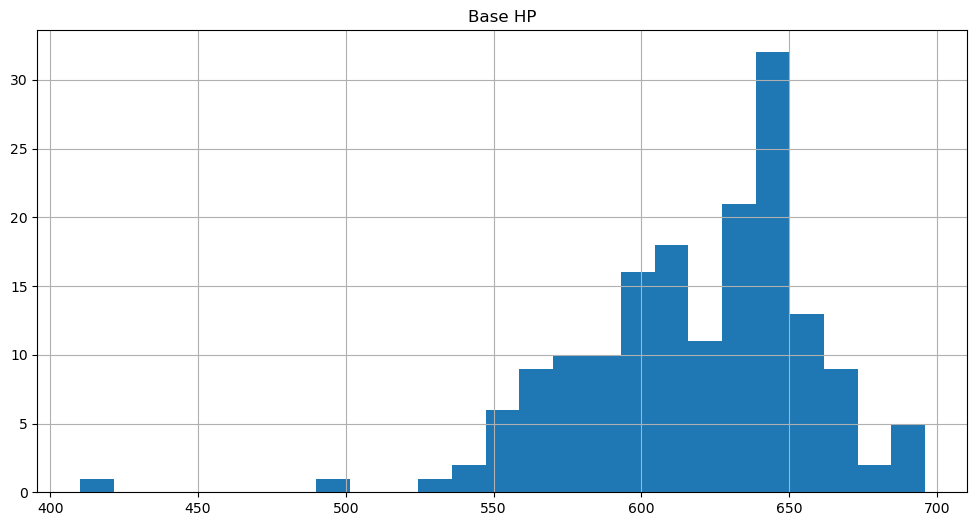

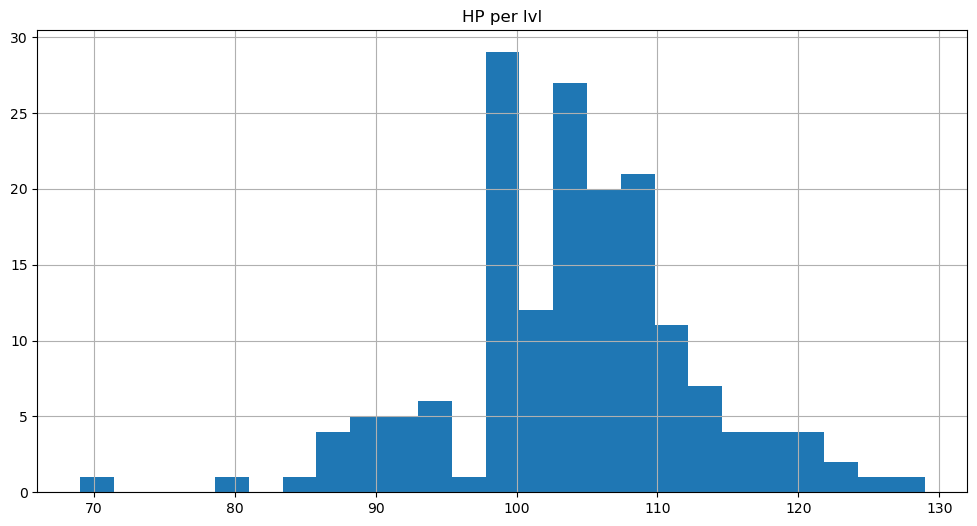

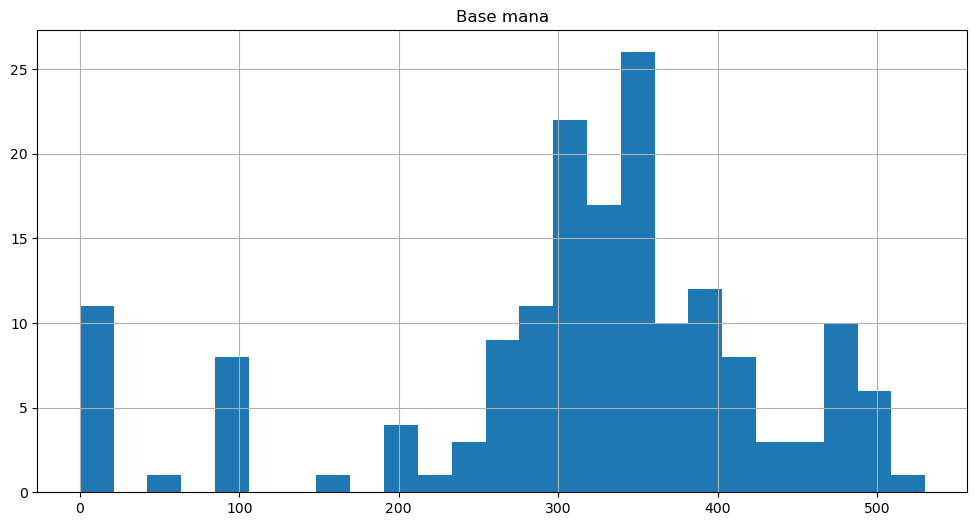

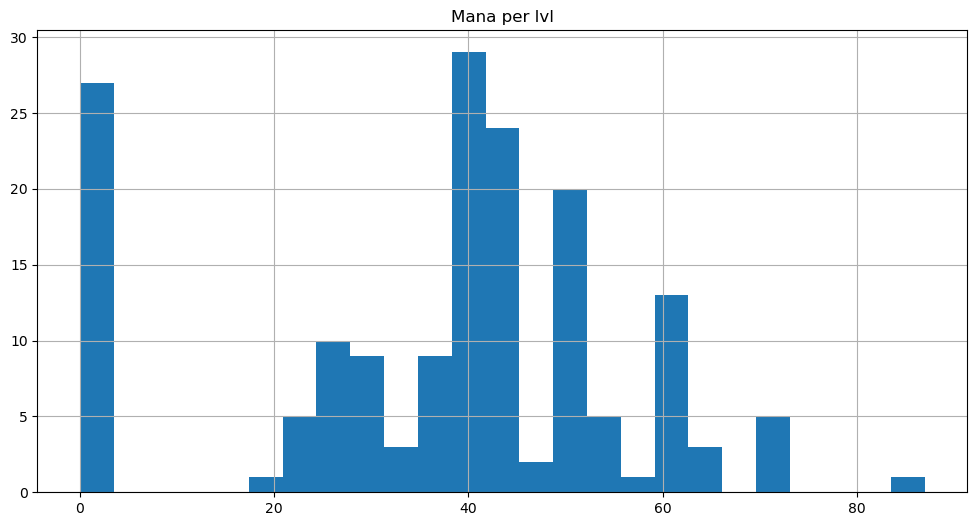

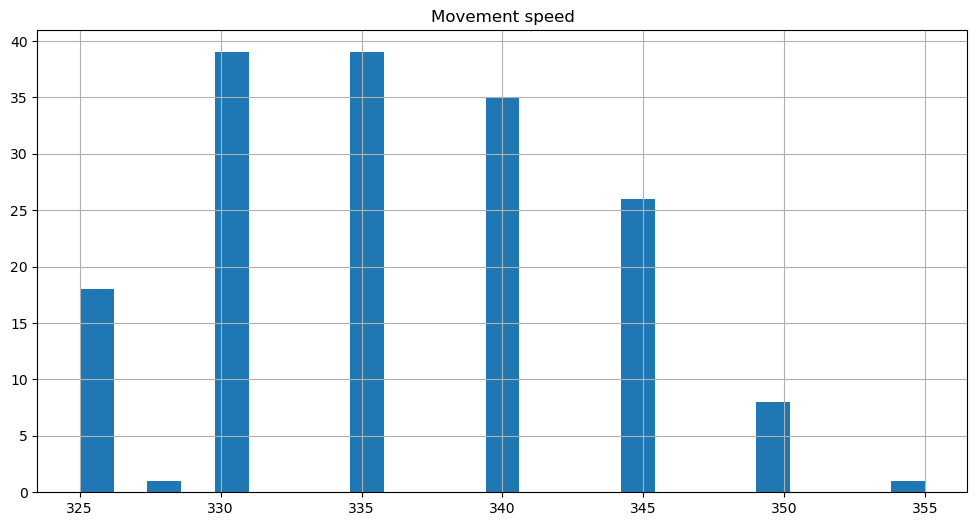

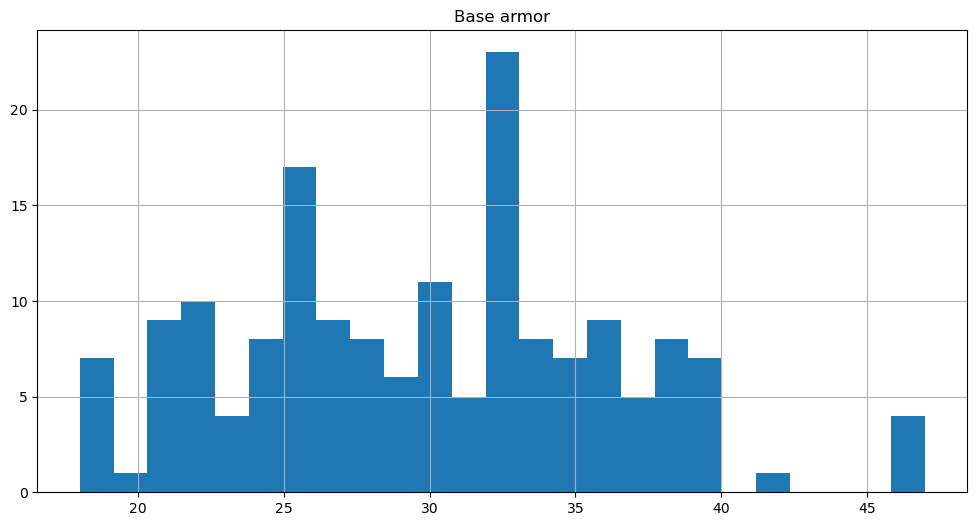

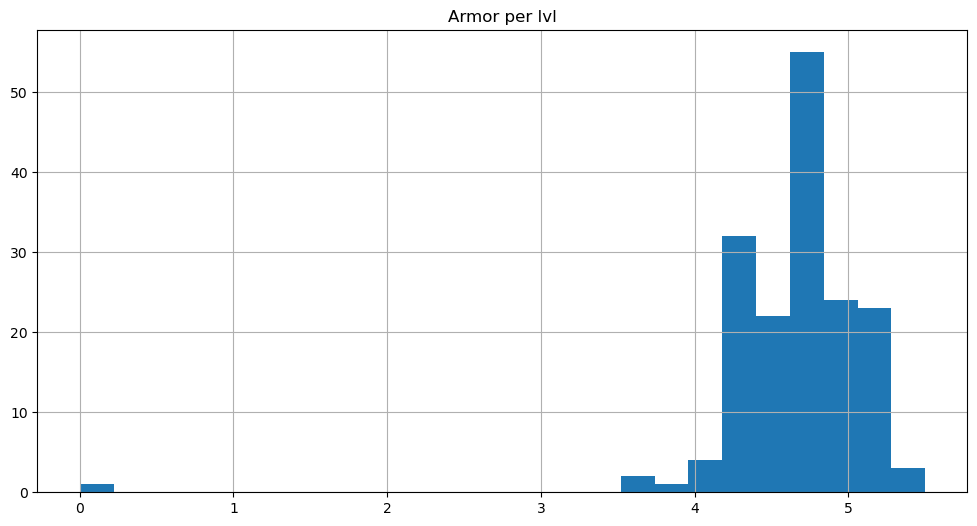

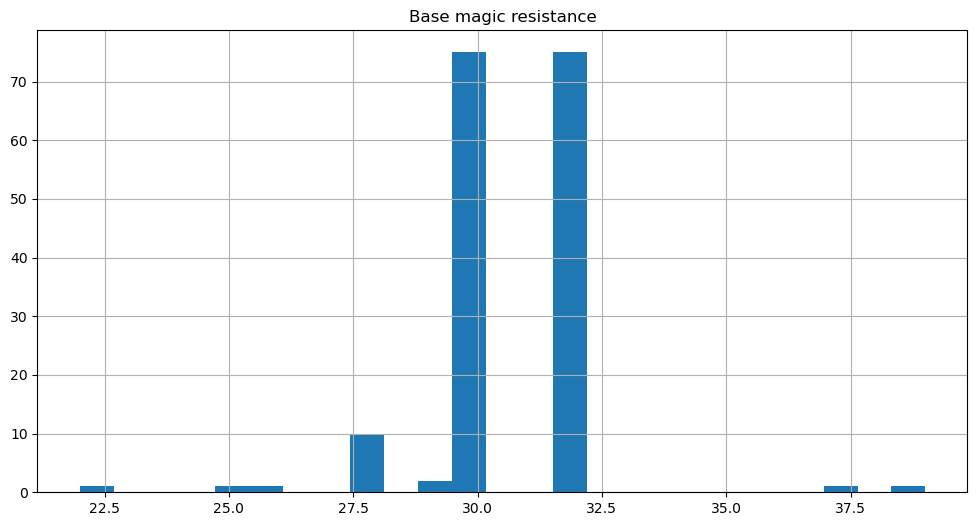

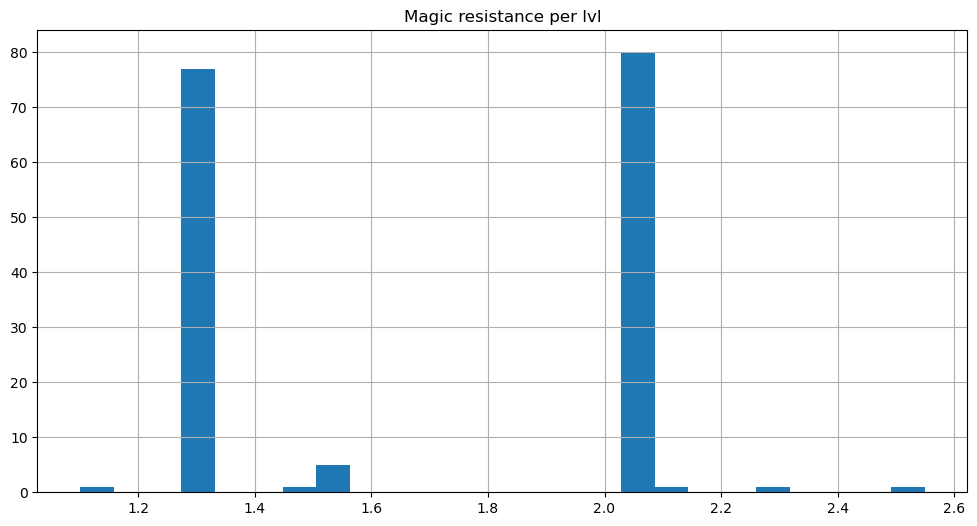

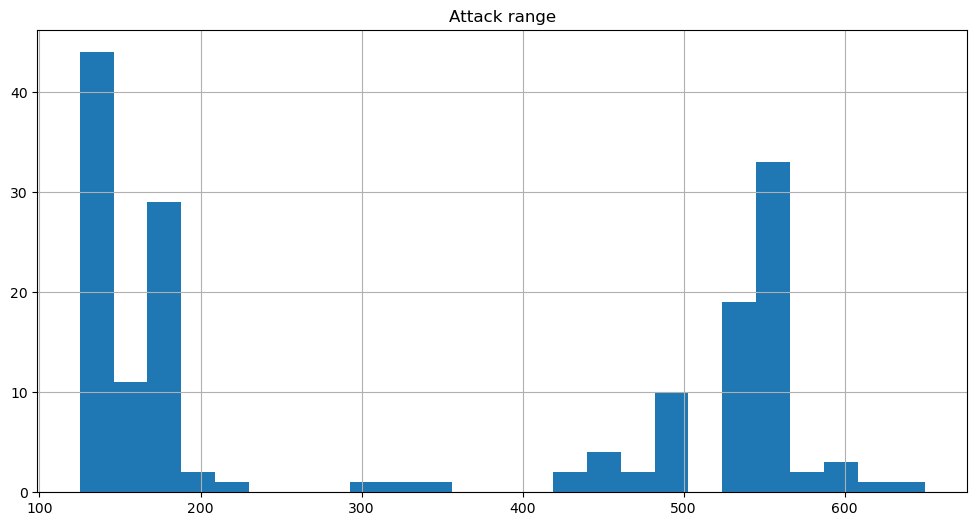

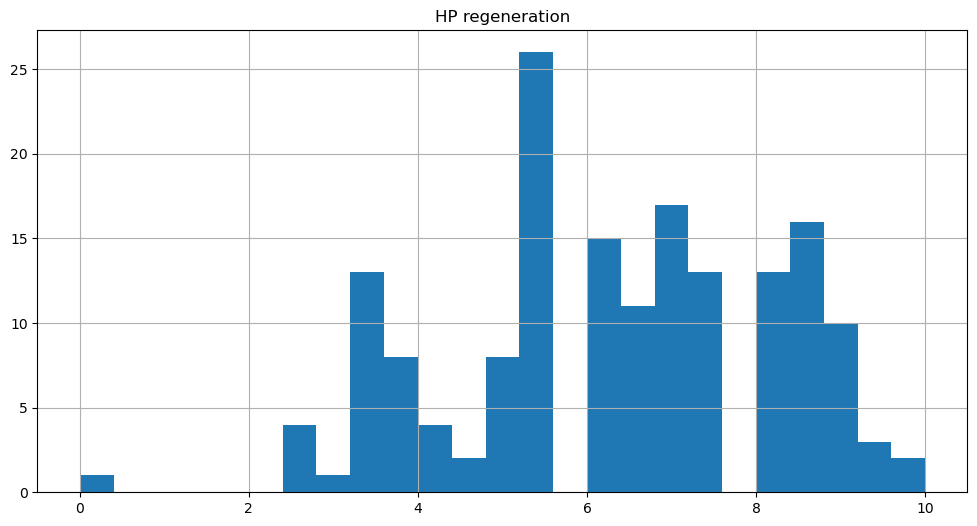

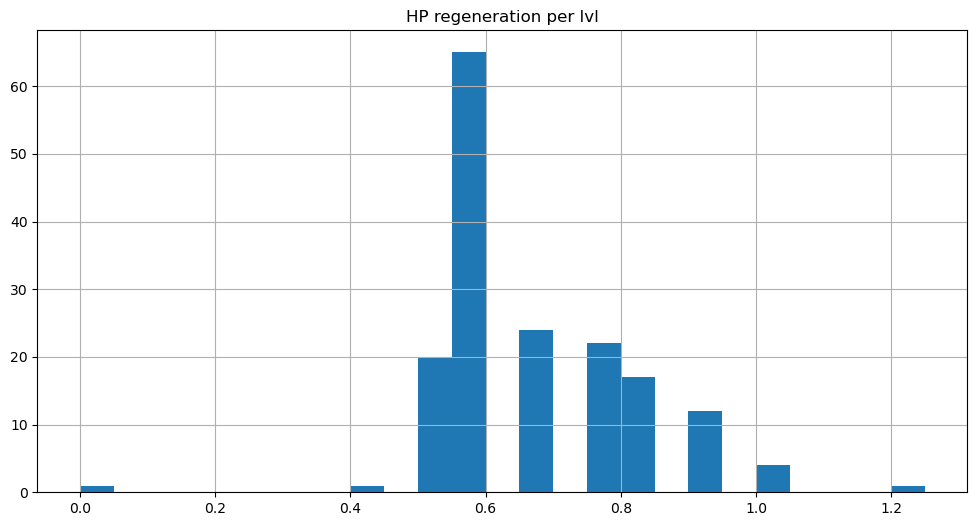

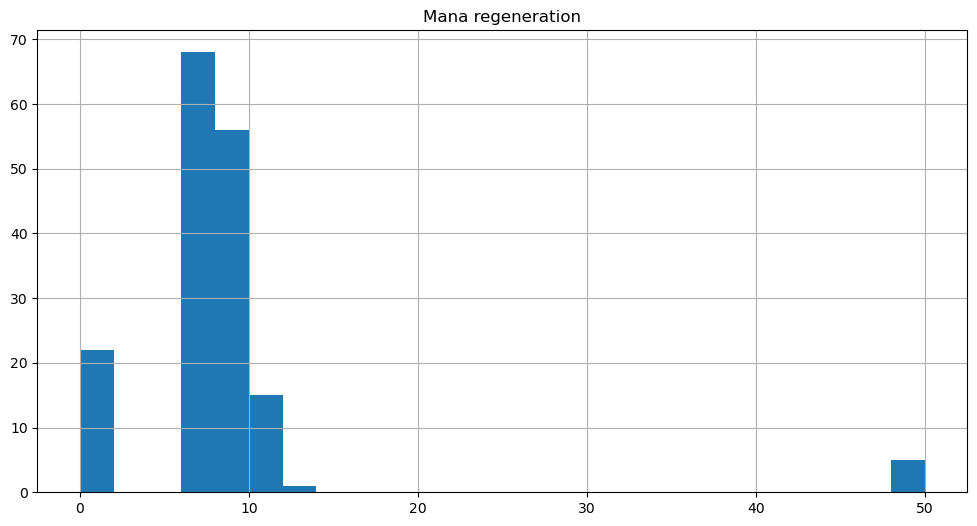

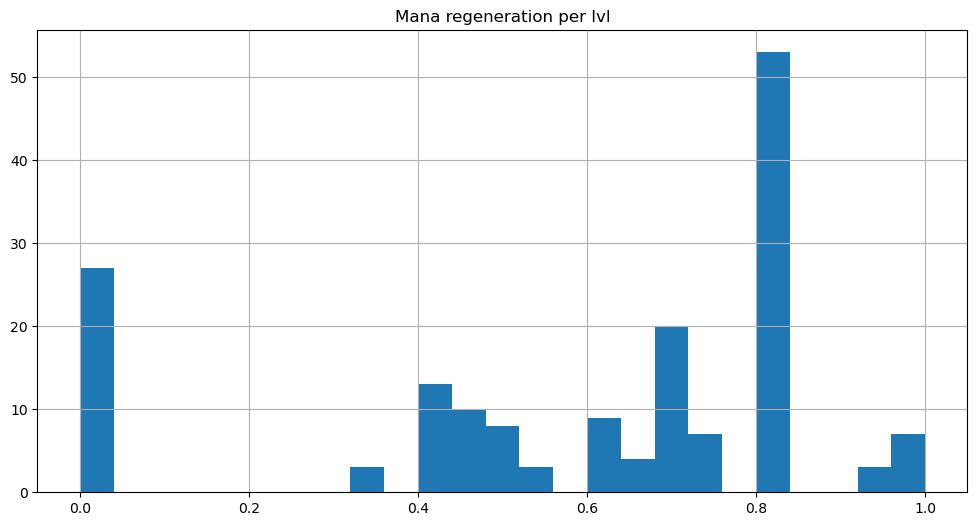

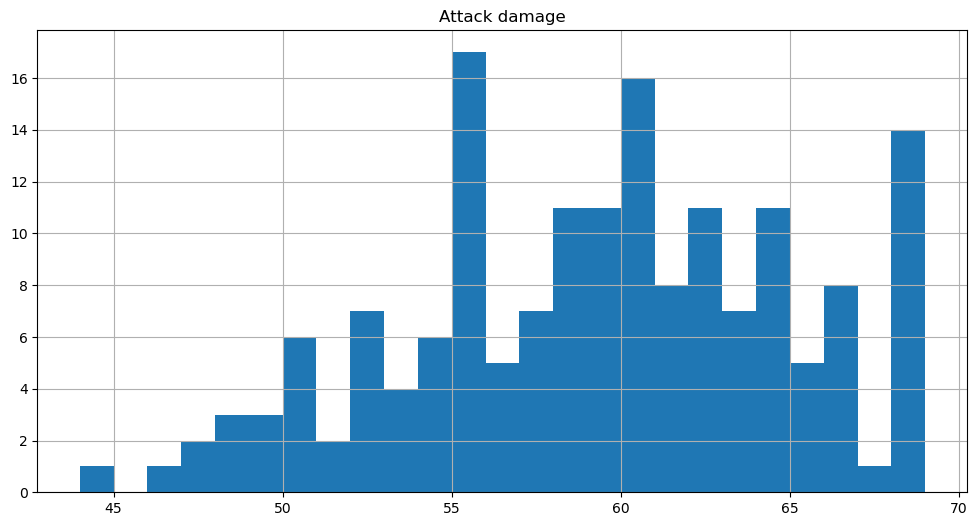

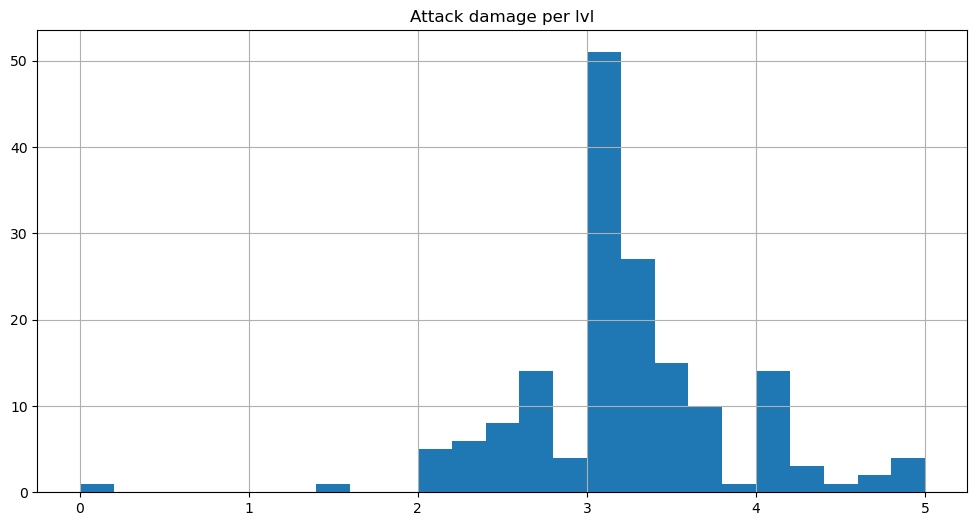

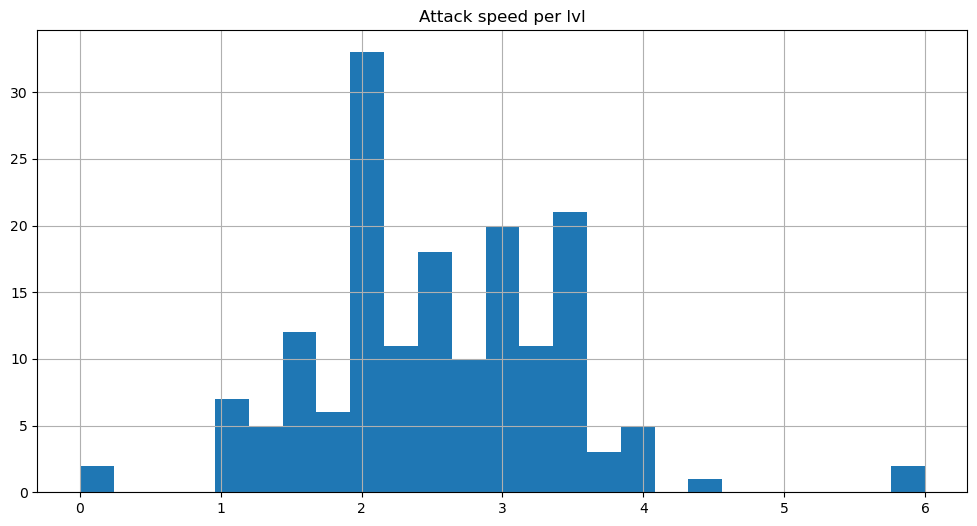

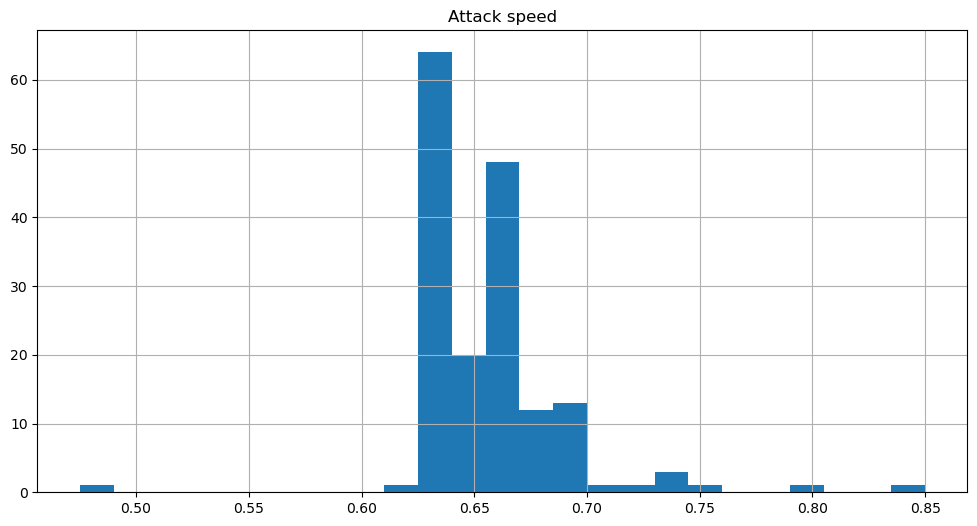

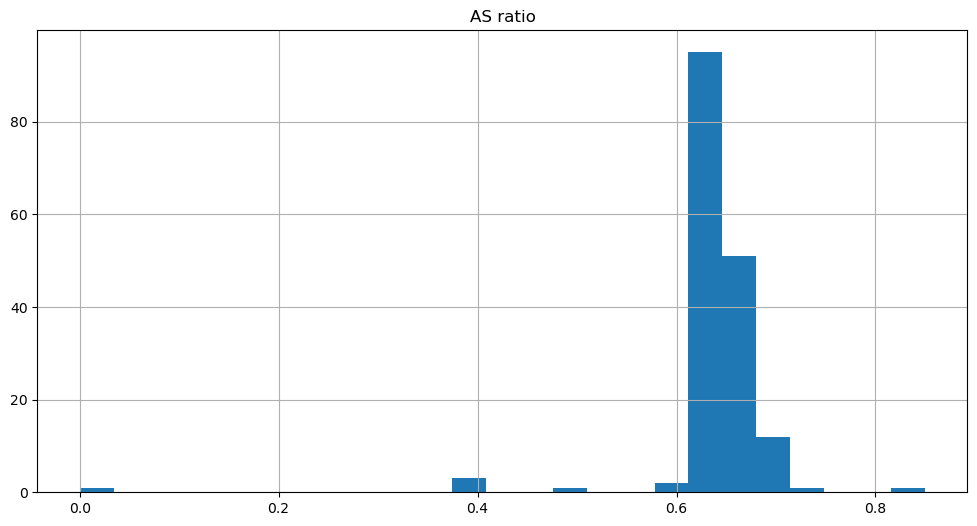

In [59]:
for i in list(numdf.columns):
    print(i)
    print('Среднее значение: ', df[i].mean())
    print('СКО: ', df[i].std())
    dfOut=Outliers(df[i])
    print('Всего выбросов: ',len(dfOut), ' ', dfOut)
    plt.figure(figsize=(12, 6))
    plt.hist(df[i], bins=25);
    plt.grid(True)
    plt.title(i)
    

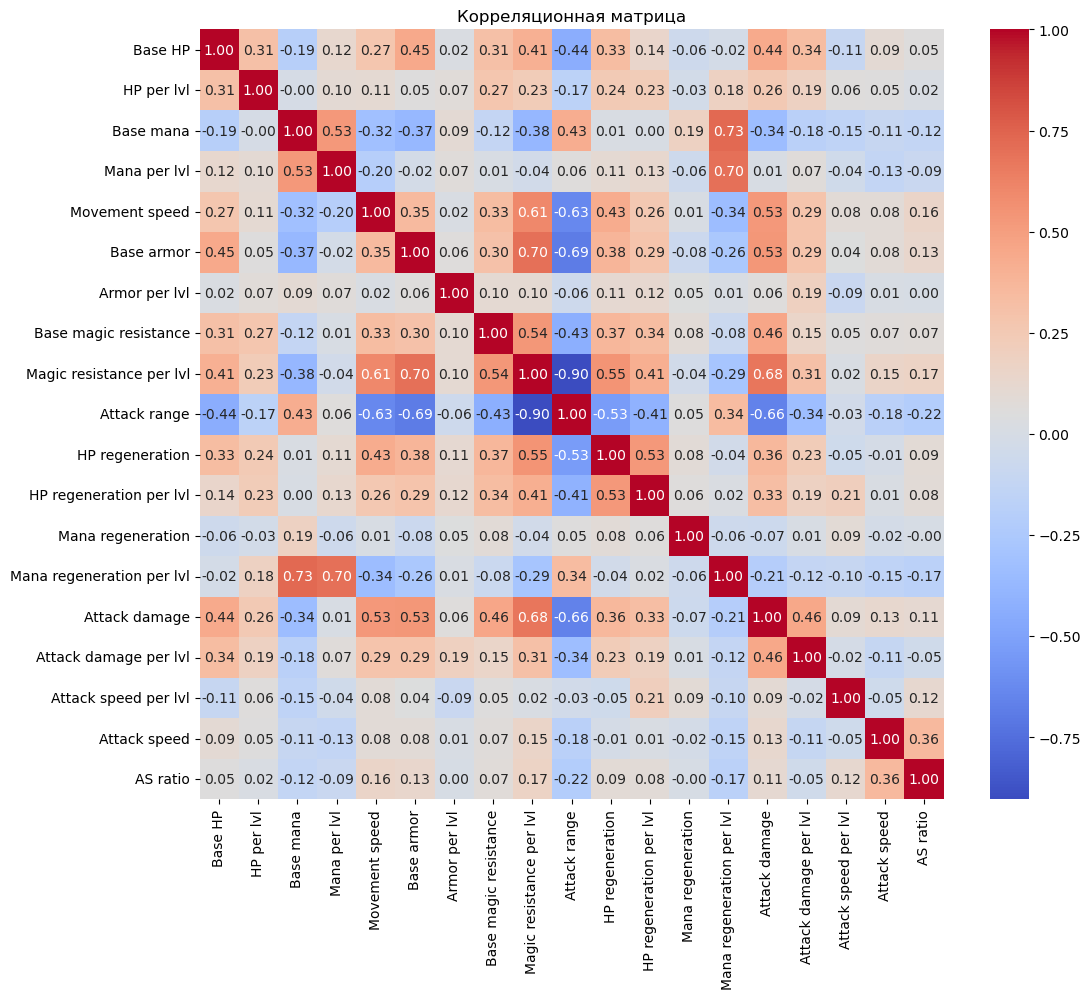

In [60]:
plt.figure(figsize=(12, 10))
sns.heatmap(numdf.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

Из корреляционной матрицы выше можно выделить следующие пары атрибутов с высокой корреляцией:<br>
Положительная:
- Magic resistance per lvl и Base armor
- Magic resistance per lvl и Attack damage
- Mana regeneration per lvl и Base mana
- Mana regeneration per lvl и Mana per lvl<br>

Отрицательная:
- Attack range и Base armor
- Attack range и Magic resistance per lvl
- Attack range и Attack damage<br>

Остальные атрибуты имеют менее выраженную корреляцию или не имеют корреляции вовсе<br>
По парам аттрибутов с высокой корреляцией построим графики рассеивания и дополнительно возьмём пару AS ratio и Armor per lvl как 

Text(0, 0.5, 'Armor per lvl')

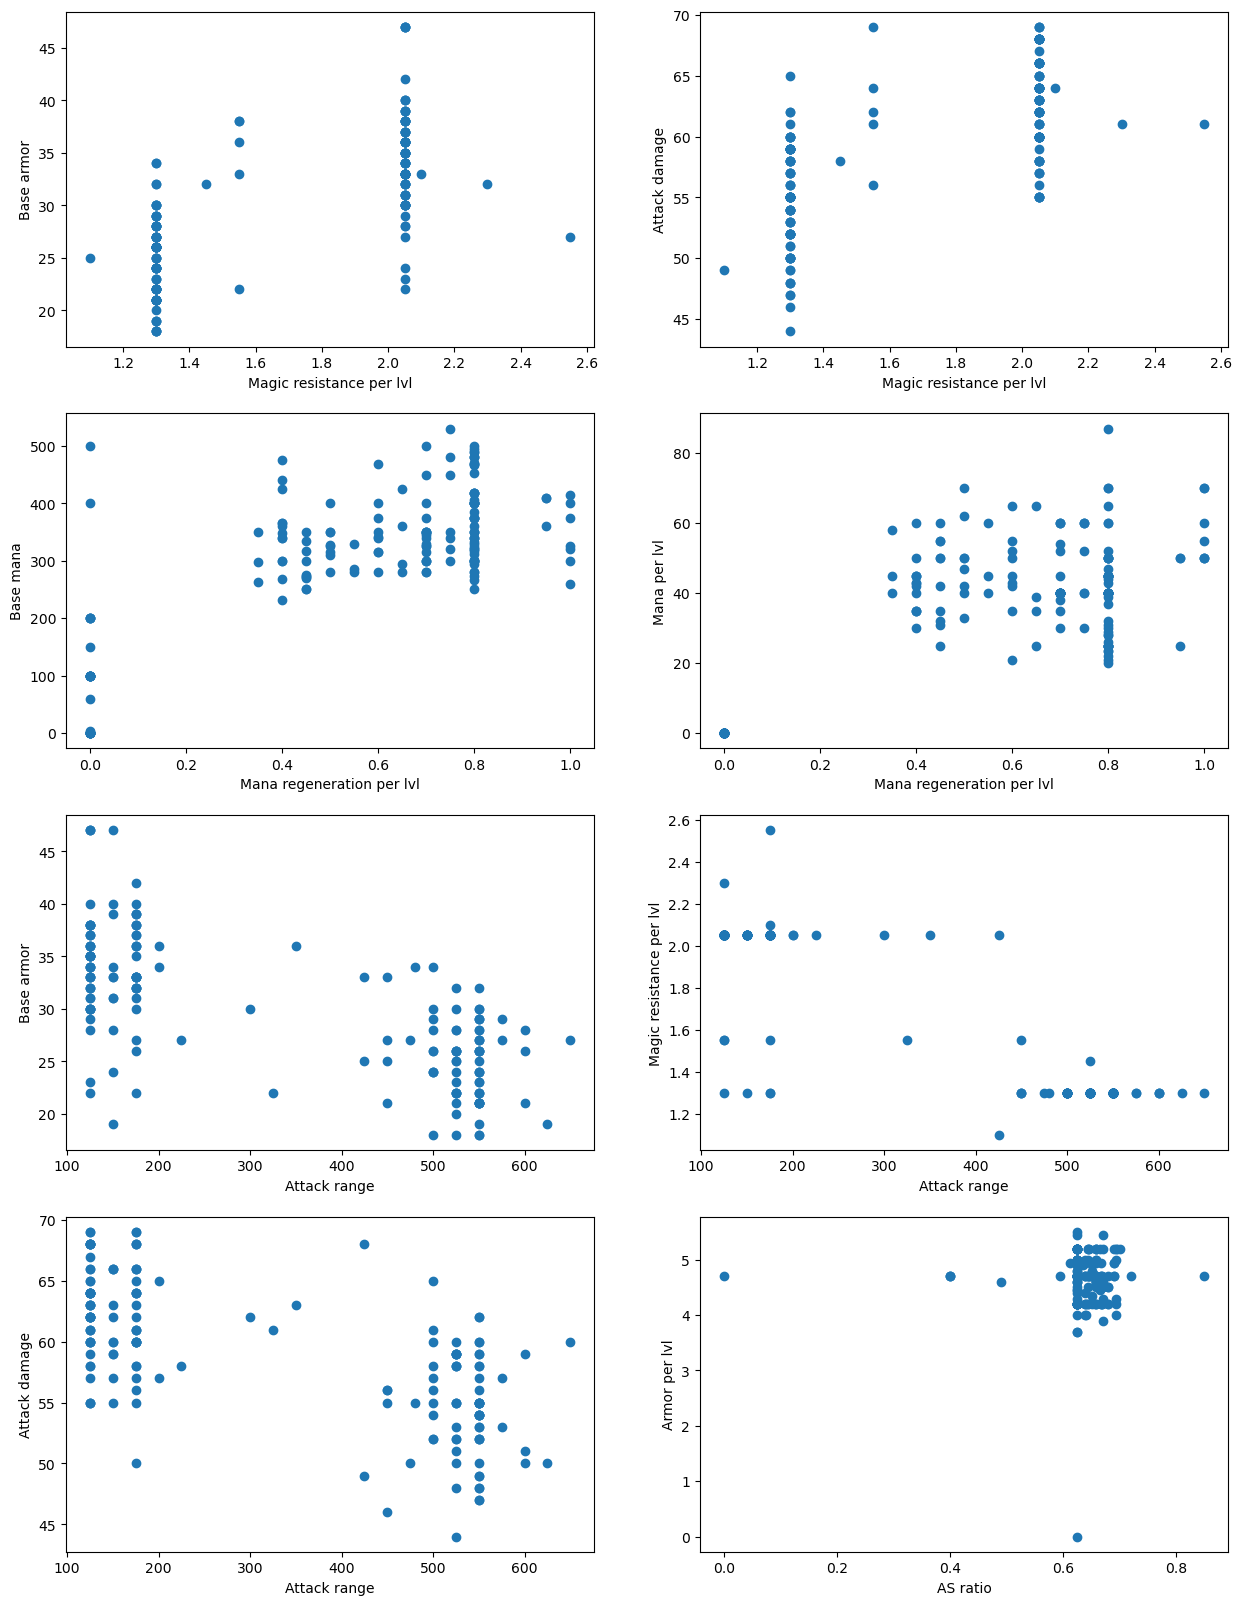

In [61]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

axes[0][0].scatter(df['Magic resistance per lvl'], df['Base armor'])
axes[0][0].set_xlabel('Magic resistance per lvl')
axes[0][0].set_ylabel('Base armor')

axes[0][1].scatter(df['Magic resistance per lvl'], df['Attack damage'])
axes[0][1].set_xlabel('Magic resistance per lvl')
axes[0][1].set_ylabel('Attack damage')

axes[1][0].scatter(df['Mana regeneration per lvl'], df['Base mana'])
axes[1][0].set_xlabel('Mana regeneration per lvl')
axes[1][0].set_ylabel('Base mana')

axes[1][1].scatter(df['Mana regeneration per lvl'], df['Mana per lvl'])
axes[1][1].set_xlabel('Mana regeneration per lvl')
axes[1][1].set_ylabel('Mana per lvl')

axes[2][0].scatter(df['Attack range'], df['Base armor'])
axes[2][0].set_xlabel('Attack range')
axes[2][0].set_ylabel('Base armor')

axes[2][1].scatter(df['Attack range'], df['Magic resistance per lvl'])
axes[2][1].set_xlabel('Attack range')
axes[2][1].set_ylabel('Magic resistance per lvl')

axes[3][0].scatter(df['Attack range'], df['Attack damage'])
axes[3][0].set_xlabel('Attack range')
axes[3][0].set_ylabel('Attack damage')

axes[3][1].scatter(df['AS ratio'], df['Armor per lvl'])
axes[3][1].set_xlabel('AS ratio')
axes[3][1].set_ylabel('Armor per lvl')